# Characterization of Discrete Systems in the Time Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Impulse Response

The concept of the so-called impulse response of discrete linear time-invariant (LTI) system and its connection to linear difference equations is introduced in the following.

### Output Signal

The response $y[k] = \mathcal{H} \{ x[k] \}$ of an LTI system to an arbitrary input signal $x[k]$ is derived. By applying the [sifting-property of the discrete Dirac impulse](../discrete_signals/standard_signals.ipynb#Dirac-Impulse), the input signal can be represented as

\begin{equation}
x[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \delta[k-\kappa]
\end{equation}

The output signal of the system is given by

\begin{equation}
y[k] = \mathcal{H} \left\{ \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \delta[k-\kappa] \right\}
\end{equation}

The summation and system response operator $\mathcal{H}$ can be exchanged under the assumption that the system is linear

\begin{equation}
y[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot \mathcal{H} \left\{ \delta[k-\kappa] \right\}
\end{equation}

where $\mathcal{H} \{\cdot\}$ was only applied to the Dirac impulse, since $x[\kappa]$ can be regarded as constant factor with respect to the index $k$.

The response of a system to a Dirac impulse as input is termed [*impulse response*](https://en.wikipedia.org/wiki/Impulse_response). It is defined as

\begin{equation}
h[k] = \mathcal{H} \left\{ \delta[k] \right\}
\end{equation}

If the system is time-invariant, the response to a shifted Dirac impulse is $\mathcal{H} \left\{ \delta[k-\kappa]) \right\} = h[k-\kappa]$. Hence, for a discrete LTI system we finally get

\begin{equation}
y[k] = \sum_{\kappa = -\infty}^{\infty} x[\kappa] \cdot h[k-\kappa] = y[k] = x[k] * h[k]
\end{equation}

This operation is termed as linear [*convolution*](https://en.wikipedia.org/wiki/Convolution) and commonly abbreviated by $*$. The properties of an LTI system are entirely characterized by its impulse response. The response $y[k]$ of a system to an arbitrary input signal $x[k]$ is given by the convolution of the input signal $x[k]$ with its impulse response $h[k]$.

### Relation to Difference Equation

The impulse response $h[k] = \mathcal{H} \{ \delta[k] \}$ is the response of an LTI system to an Dirac impulse at the input. It can be derived from the coefficients of a [linear differential equation representing the LTI system](difference_equation.ipynb) by computing the output signal for the input signal $x[k] = \delta[k]$. Introducing this into the [solution of the difference equation](difference_equation.ipynb#Computation-of-the-Output-Signal) yields

\begin{equation}
h[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; \delta[k-m] - \sum_{n=1}^{N} a_n \; h[k-n] \right)
\end{equation}

### Finite Impulse Response

Let's consider the case of a [non-recursive system](difference_equation.ipynb#Recursive-and-Non-Recursive-Systems) with $a_n = 0$ for $n > 0$. Without loss of generality it can be assumed that $a_0 = 1$, since $\frac{1}{a_0}$ can be incorporated into the other coefficients by dividing them through $a_0$. The impulse response is given as

\begin{equation}
h[k] = \sum_{m=0}^{M} b_m \; \delta[k-m] = \begin{cases} b_k & \text{for } 0 \leq k < M \\ 0 & \text{otherwise} \end{cases}
\end{equation}

Note that the summation in above formula constitutes a convolution between the signal given by the samples $b_m$ and the Dirac impulse $\delta[k]$. The impulse response of a non-recursive system is of finite length $M$. Its values are given by the coefficients $b_m$ of the linear difference equation characterizing the system. An impulse response of finite length is commonly termed [finite impulse response (FIR)](https://en.wikipedia.org/wiki/Finite_impulse_response). The term FIR (system) is used synonymously to non-recursive system. The former relates to the length of the impulse response and the latter to the structure of the system.

**Example - Moving Average**

According to above findings, the impulse response of the [moving average filter](difference_equation.ipynb#Moving-Average) is given as

\begin{equation}
h[k] = \frac{1}{N} \cdot \text{rect}_N[k]
\end{equation}

As alternative to the [solution of the difference equation illustrated before](difference_equation.ipynb#Moving-Average), the output signal $y[k] = \mathcal{H} \{ y[k] \}$ is computed by convolution of the (same) input signal.

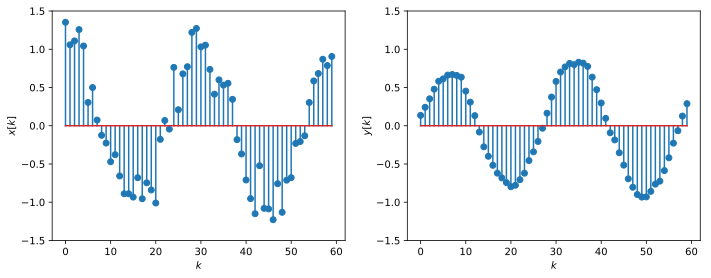

In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline


def rect(k, N):
    return np.where((k >= 0) & (k < N), 1.0, 0.0)


np.random.seed(seed=0)

N = 10

k = np.arange(0, 60)
h = 1/N * rect(k, N)
x = np.cos(2*np.pi/30 * k) + .2 * np.random.normal(size=(len(k)))
y = np.convolve(x, h)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.stem(k, x)
plt.xlabel('$k$')
plt.ylabel(r'$x[k]$')
plt.ylim([-1.5, 1.5])

plt.subplot(122)
plt.stem(k, y[0:len(x)])
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.ylim([-1.5, 1.5])
plt.tight_layout()

**Exercise**

* Compare above output signal $y[k]$ derived by convolution with the output signal derived by [solution of the difference equation](difference_equation.ipynb#Moving-Average).

### Infinite Impulse Response

Now the general case of a [recursive system](difference_equation.ipynb#Recursive-and-Non-Recursive-Systems) is regarded. By inspection of above formula for the computation of the impulse response from the coefficients of a linear difference equation it becomes clear that the impulse response $h[k]$ for time-instant $k$ depends on the impulse response of past time instants $k-1, \dots, k-N+1$. This feedback generally results in an impulse response of infinite length. Such an impulse response is commonly termed as [infinite impulse response (IIR)](https://en.wikipedia.org/wiki/Infinite_impulse_response). The term IIR (system) is used synonymously to recursive system. The former relates to the length of the impulse response and the latter to the structure of the system.

For a finite-length input signal $x[k]$ the output signal of a recursive system cannot be computed by a linear convolution $y[k] = x[k] * h[k]$ in practice. This is due to the infinite length of its impulse response. As practical solution, the impulse response is often truncated to a finite length after its has decayed reasonably.

**Example**

The impulse response $h[k]$ of the previously introduced [second-order recursive LTI system](difference_equation.ipynb#Second-Order-System) with the difference equation

\begin{equation}
y[k] - y[k-1] + \frac{1}{2} y[k-2] = x[k]
\end{equation}

is derived by solution of the difference equation for a Dirac impulse as input signal. As can be deduced from its difference equation, the second-order recursive system has an IIR. Its first 256 samples are computed and plotted in the following. Note, less samples have been shown for ease of illustration.

[0, 25, -0.5, 1.2]

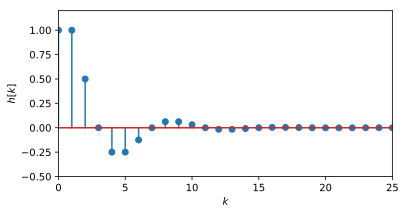

In [2]:
def dirac(k):
    return np.where(k == 0, 1.0, 0.0)


a = [1.0, -1.0, 1/2]
b = [1.0]

k = np.arange(256)
x = dirac(k)
h = signal.lfilter(b, a, x)

plt.figure(figsize=(6, 3))
plt.stem(k, h)
plt.xlabel('$k$')
plt.ylabel(r'$h[k]$')
plt.axis([0, 25, -.5, 1.2])

In order to illustrate the amplitude decay of the impulse response over a wider range, its magnitude $A[k]$ is plotted in [decibel (dB)](https://en.wikipedia.org/wiki/Decibel)

\begin{equation}
A[k] = 20 \cdot \log_{10} ( |h[k]| ) \quad \text{in dB}
\end{equation}

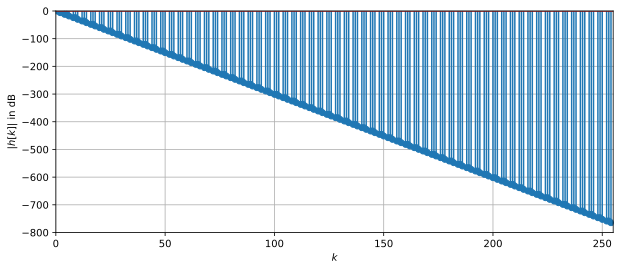

In [3]:
import warnings
warnings.filterwarnings('ignore', 'divide by zero encountered in log10')

plt.figure(figsize=(10, 4))
plt.stem(k, 20*np.log10(np.abs(h)))
plt.xlabel('$k$')
plt.ylabel(r'$|h[k]|$ in dB')
plt.axis([0, k[-1], -800, 0])
plt.grid()

Its obvious that the magnitude of the impulse response has decayed to quite small values after 256 samples. The truncated impulse response can be used to calculate the output signal $y[k]$ by convolution with the input signal $x[k] = \text{rect}_{20}[k]$. The resulting output signal is plotted for illustration.

[0, 40, -0.7, 2.6]

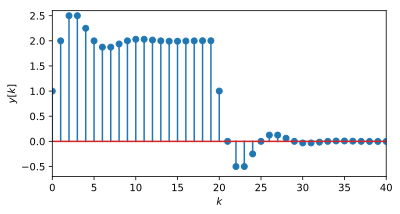

In [4]:
def rect(k, N):
    return np.where((k >= 0) & (k < N), 1.0, 0.0)


x = rect(k, 20)
y_ir = np.convolve(h, x)

plt.figure(figsize=(6, 3))
plt.stem(k, y_ir[:len(k)])
plt.xlabel('$k$')
plt.ylabel(r'$y[k]$')
plt.axis([0, 40, -.7, 2.6])

**Exercise**

* Compare the output signal computed by convolution with the one [computed by solution of the difference equation](difference_equation.ipynb#Second-Order-System).

* Investigate the effect of truncating an IIR on the output signal computed by convolution

    * Split the IIR $h[k]$ into two parts: a first part holding the samples of the truncated impulse response and second part holding the remaining samples
    * Split the output signal into to parts by splitting the convolution using the splitted impulse response

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.